In [1]:
import numpy as np
import pandas as pd

In [2]:
!ls ../data/raw

album_item_mapping.parquet   likes.parquet        undislikes.parquet
artist_item_mapping.parquet  listens.parquet      unlikes.parquet
dislikes.parquet             multi_event.parquet


In [3]:
df = pd.read_parquet("../data/raw/likes.parquet")

In [4]:
df

,uid,timestamp,item_id,is_organic
0,100,44755,732449,1
1,100,1155860,6568592,0
2,100,1259125,5411243,1
3,100,1260005,7371186,0
4,100,1263935,4943655,0
...,...,...,...,...
881451,999900,25710740,1005397,1
881452,1000000,14299485,3694666,1
881453,1000000,19336945,7071820,0
881454,1000000,19337350,4465732,0


In [5]:
user_inter_cnt_df = df[["uid", "item_id"]].groupby("uid").count().rename(columns={"item_id":"items_count"})
user_inter_cnt_df

,items_count
uid,
100,20
300,44
400,58
500,4
700,2
...,...
999400,79
999700,8
999800,6


In [6]:
user_inter_cnt_df.mean(), user_inter_cnt_df.median()

(items_count    106.417482
 dtype: float64,
 items_count    44.0
 dtype: float64)

<Axes: >

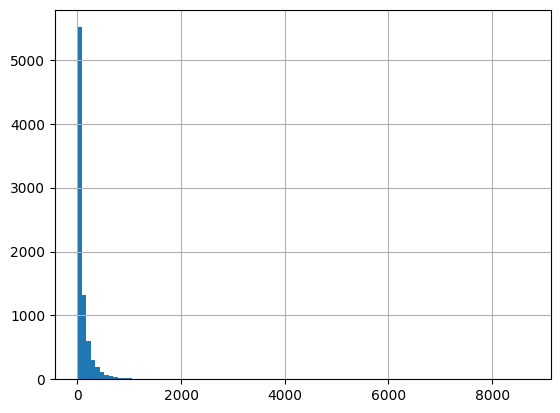

In [7]:
user_inter_cnt_df["items_count"].hist(bins=100)

array([[<Axes: title={'center': 'users_count'}>]], dtype=object)

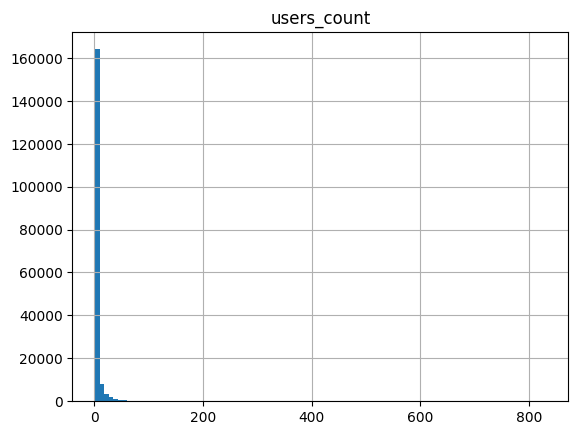

In [8]:
item_inter_cnt_df = df[["item_id", "uid"]].groupby("item_id").count().rename(columns={"uid":"users_count"})
item_inter_cnt_df.hist(bins=100)

In [9]:
item_inter_cnt_df.mean(), item_inter_cnt_df.median()

(users_count    4.861757
 dtype: float64,
 users_count    1.0
 dtype: float64)